# scikit-learnによる重回帰分析

## データの読み込み

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('housing.data.csv')

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#レコード数の確認
len(df)

506

In [5]:
#統計量の算出
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 分布の確認

In [6]:
%matplotlib inline
import seaborn as sns
sns.set()

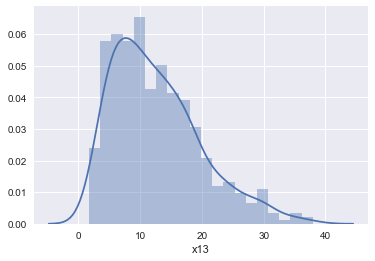

In [7]:
#分布の確認
sns.distplot(df['x13'], bins = 20)

## 相関関係の確認

In [8]:
#相関係数の算出
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


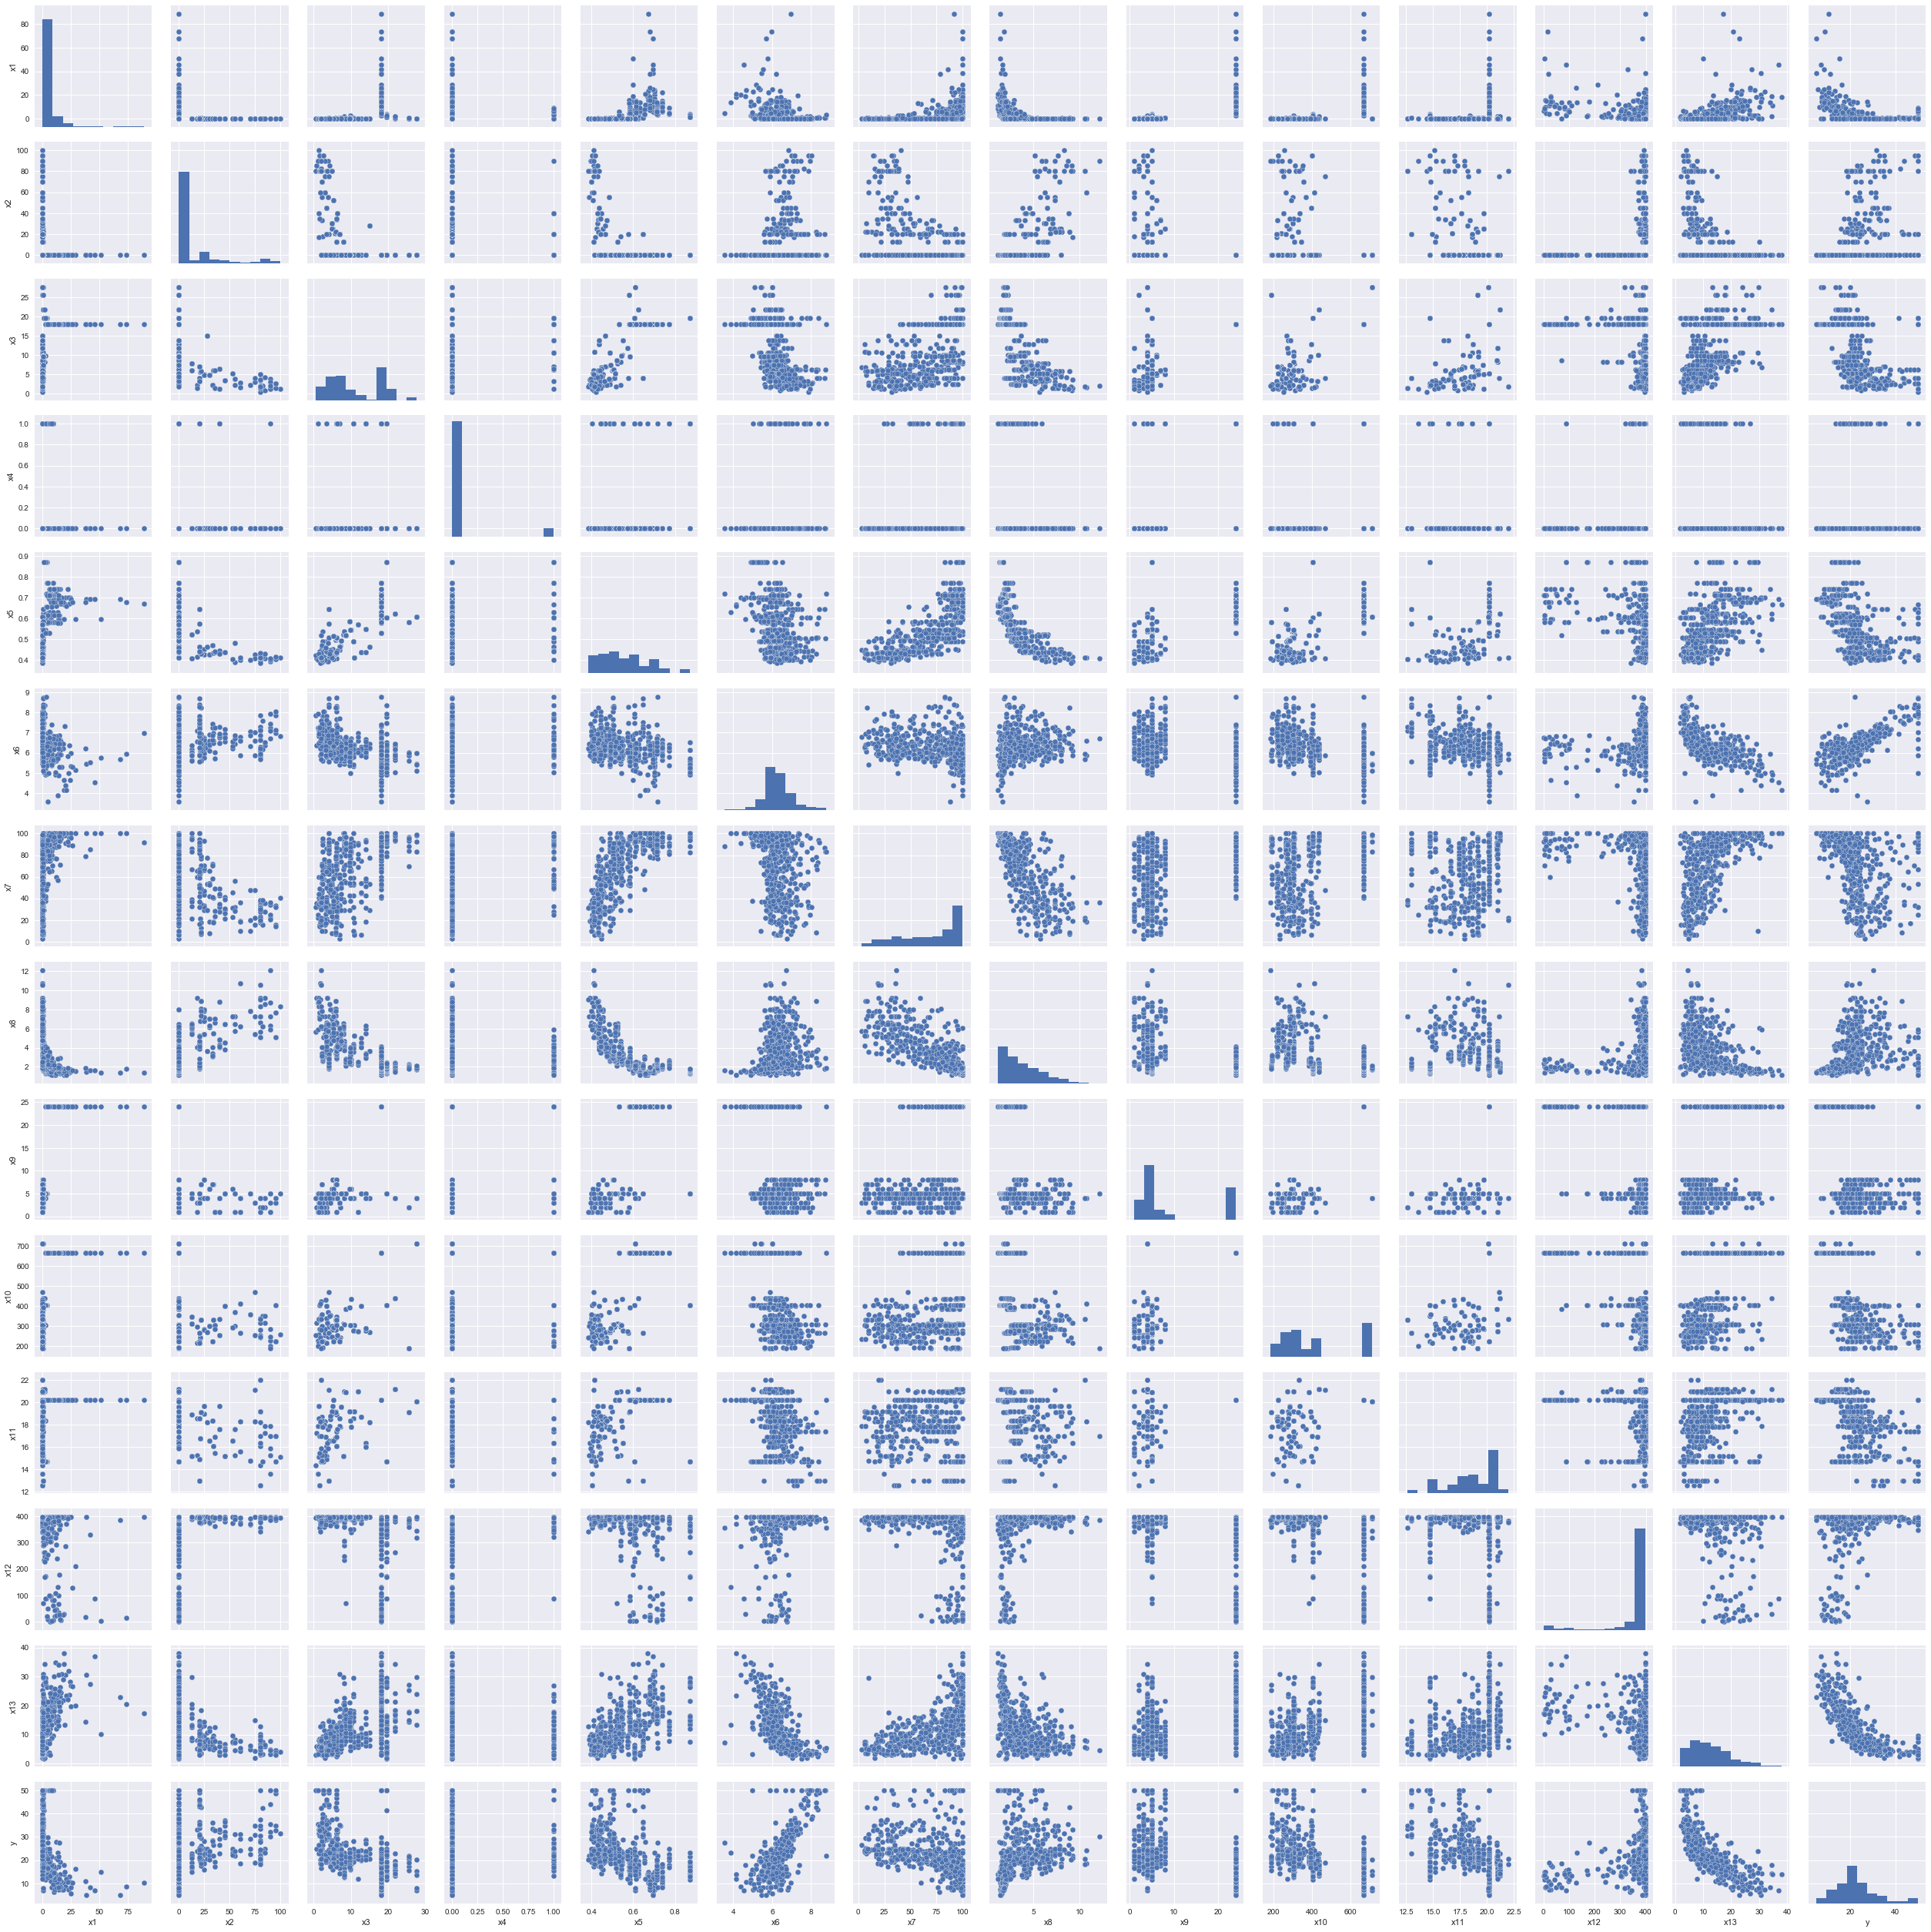

In [9]:
#相関係数を目視で確認
sns.pairplot(df)

#ラベルをつけるのはどうやってやる？

#相関係数見ながら，分布見ながら，全体見ながら

## 入力変数と出力変数の切り分け

In [10]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [11]:
#df.iloc[行，列]

In [12]:
df.iloc[0,0]

0.00632

In [13]:
#df.iloc[:,0:13]
X = df.iloc[:,:-1]
#-1とすると，最後の列を抽出できる
y = df.iloc[:,-1]

In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: y, dtype: float64

## モデル構築と検証

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#モデルの宣言
model = LinearRegression()

In [17]:
#モデルの学習
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#検証（決定係数の計算）
model.score(X,y)

0.7406426641094094

## 訓練 (training) データと検証 (test) データを分割

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#訓練データと検証データの分割

In [21]:
#shift + tabでヘルプ出せる
#testデータ40%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 1) #random_stateは乱数のシードを固定（再現性の確保）

In [22]:
#モデルの学習
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#検証　←　検証データ
model.score(X_test,y_test)

0.7209056672661771

In [24]:
#検証　←　訓練データ
model.score(X_train, y_train)

0.7468316520140624

## 予測値の計算

In [25]:
x = X.iloc[0,:]
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [26]:
#予測値の計算
y_pred = model.predict([x])[0]
y_pred


29.423688469405334

## モデルの保存

In [27]:
from sklearn.externals import joblib

In [28]:
#モデルの保存
joblib.dump(model, 'model.pkl')

['model.pkl']

## モデルの読み込み

In [29]:
model_new = joblib.load('model.pkl')

In [30]:
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [31]:
model_new.predict([x])[0]

29.423688469405334

## パラメータの確認

In [32]:
#パラメータwの値
model.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

In [33]:
#なぜうまく行ったのか？
#重みが効いている

np.set_printoptions(precision = 3, suppress = True) #指数関数での表示が禁止


In [34]:
model.coef_
#スケール異なるので，このままの解釈では危険

array([ -0.09 ,   0.067,   0.05 ,   2.186, -17.205,   3.636,   0.002,
        -1.366,   0.29 ,  -0.012,  -0.835,   0.009,  -0.504])

In [35]:
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


重み(パラメータ$w$)を見るだけではどの変数が影響を与えているかわからない